In [3]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap
import seawater as sw
import datetime
%matplotlib inline

In [4]:
run1 = xr.open_dataset('/home/soontiensn/data/gpsc-work2/OPP/opendrift_test/DriftMap/riops_linear_basemap/output/riopsps_od_2019090600_P2D.nc')
run2 = xr.open_dataset('/home/soontiensn/data/gpsc-work2/OPP/opendrift_test/DriftMap/riops_linear_oceanmodel/output/riopsps_od_2019090600_P2D.nc')


In [5]:
run1

<xarray.Dataset>
Dimensions:     (model_run: 225, time: 49)
Coordinates:
  * time        (time) datetime64[ns] 2019-09-06 ... 2019-09-08
Dimensions without coordinates: model_run
Data variables:
    mod_lat     (model_run, time) float32 ...
    mod_lon     (model_run, time) float32 ...
    mod_dist    (model_run, time) float64 ...
    mod_disp    (model_run, time) float64 ...
    track_dist  (model_run, time) float64 ...
    ratio       (model_run, time) float64 ...
Attributes:
    mod_Conventions:                                  CF-1.6
    mod_standard_name_vocabulary:                     CF-1.6
    mod_featureType:                                  trajectory
    mod_history:                                      Created 2019-12-20 16:1...
    mod_source:                                       Output from simulation ...
    mod_model_url:                                    https://github.com/Open...
    mod_opendrift_class:                              OceanDrift
    mod_opendrift_modu

In [6]:
start = datetime.datetime(2019,9,6)
dates = [start + datetime.timedelta(days=n) for n in range(2)]
dates.append(run2.time.values[-1])
dist = np.zeros((run2.mod_lon.shape[0],len(dates)))
for n, d in enumerate(dates):
    run2_sel = run2.sel(time=d)
    run1_sel = run1.sel(time=d)
    for p in range(dist.shape[0]):
        lat = np.array([run2_sel.mod_lat.values[p], run1_sel.mod_lat.values[p]])
        lon = np.array([run2_sel.mod_lon.values[p], run1_sel.mod_lon.values[p]])
        dist[p, n] = sw.dist(lat,lon)[0] # distance defualts in km

In [7]:
def plot_Scatter(bmap, dist, lat_orig, lon_orig):
    x, y = bmap(lon_orig, lat_orig)
    mesh = bmap.scatter(x,y,c=dist)
    cbar=plt.colorbar(mesh,ax=ax)
    cbar.set_label('separation [km]', fontsize=16)
    cbar.ax.tick_params(labelsize=16)
    bmap.drawcoastlines()

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


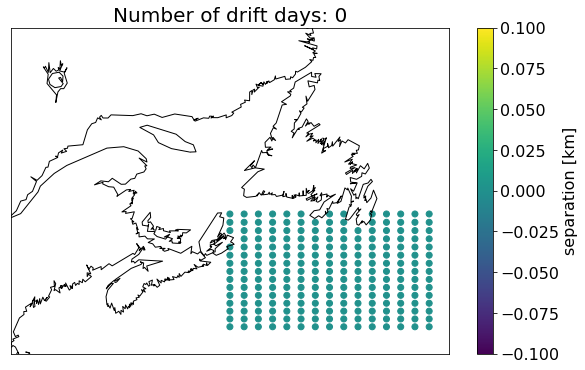

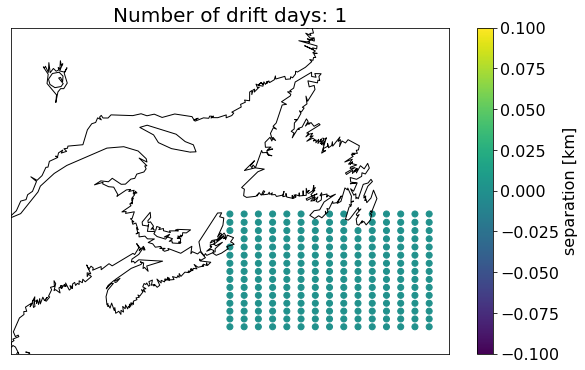

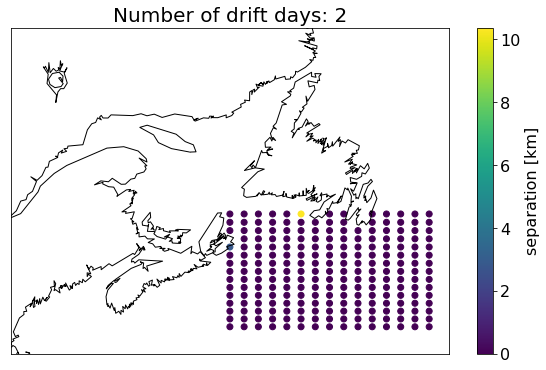

In [8]:
init_lon=run2.mod_lon.values[:,0]
init_lat=run2.mod_lat.values[:,0]
for n, date in enumerate(dates):
    fig,ax = plt.subplots(1,1, figsize=(10,6))
    m = Basemap(projection='merc',llcrnrlat=42,urcrnrlat=53,llcrnrlon=-71,urcrnrlon=-49,resolution='l')
    plot_Scatter(m, dist[:,n],init_lat,init_lon)
    ax.set_title('Number of drift days: {}'.format(n), fontsize=20)

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


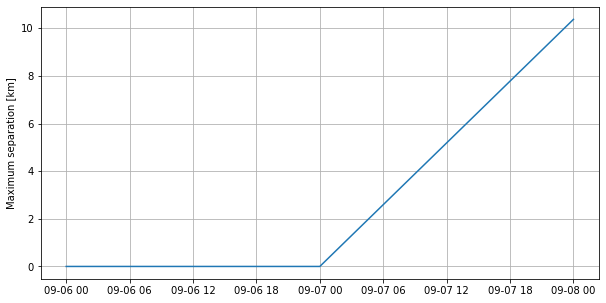

In [9]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(dates,np.nanmax(dist, axis=0))
ax.set_ylabel('Maximum separation [km]')
ax.grid()

In [10]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(dates,np.nanmin(dist, axis=0))
ax.set_ylabel('Minimum separation [km]')
ax.grid()

In [11]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_ylabel('Separation [km]', fontsize=20)
for i in range(dist.shape[0]):
    ax.plot(dates,dist[i], c='C0',alpha=0.5)
ax.plot(dates,np.nanmedian(dist, axis=0),c='C1',lw=3)
ax.grid()
#fake legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C1', lw=3)]
ax.legend(custom_lines, ['Median'],fontsize=16)
ax.tick_params(axis='both', labelsize=20)
fig.autofmt_xdate()


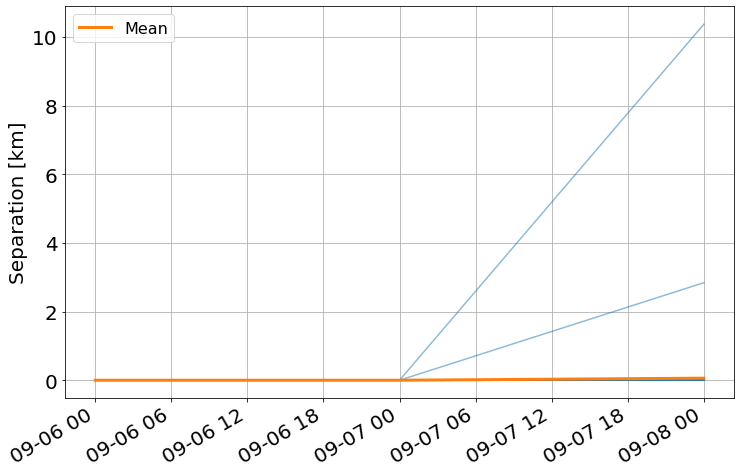

In [12]:
fig,ax=plt.subplots(1,1,figsize=(12,8))

ax.set_ylabel('Separation [km]', fontsize=20)
for i in range(dist.shape[0]):
    ax.plot(dates,dist[i], c='C0',alpha=0.5)
ax.plot(dates,np.nanmean(dist, axis=0),c='C1',lw=3)
ax.grid()
#fake legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C1', lw=3)]
ax.legend(custom_lines, ['Mean'],fontsize=16)
ax.tick_params(axis='both', labelsize=20)
fig.autofmt_xdate()

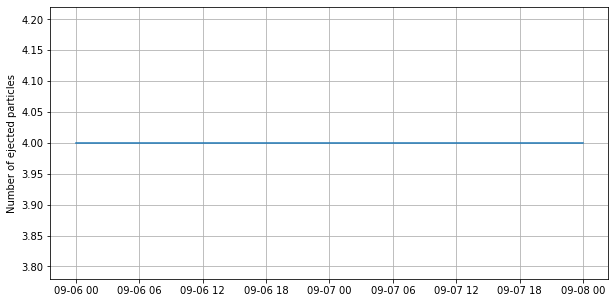

In [13]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(dates,np.count_nonzero(np.isnan(dist), axis=0))
ax.set_ylabel('Number of ejected particles')
ax.grid()

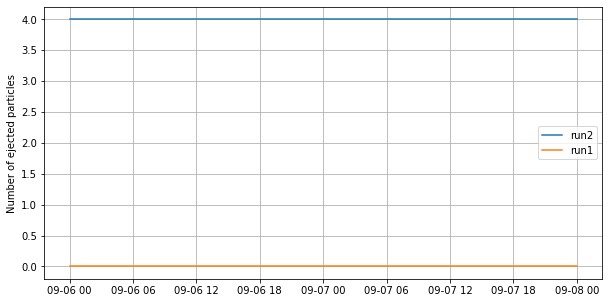

In [14]:
dummy_run2 = np.zeros((run2.mod_lon.shape[0],len(dates)))
dummy_run1 = np.zeros((run1.mod_lon.shape[0],len(dates)))
for n, d in enumerate(dates):
    run2_sel = run2.sel(time=d)
    run1_sel = run1.sel(time=d)
    dummy_run2[:, n] = run2_sel.mod_lon.values
    dummy_run1[:, n] = run1_sel.mod_lon.values
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(dates,np.count_nonzero(np.isnan(dummy_run2), axis=0),label='run2')
ax.plot(dates,np.count_nonzero(np.isnan(dummy_run1), axis=0),label='run1')
ax.set_ylabel('Number of ejected particles')
ax.legend()
ax.grid()

How do I isolate which of these particles are on land?

In [15]:
def plot_Scatter(bmap, lat1,lon1, lat2, lon2):
    x1, y1 = bmap(lon1, lat1)
    x2, y2 = bmap(lon2, lat2)
    bmap.plot(x1,y1,'.C0',ms=1)
    bmap.plot(x2,y2,'.C1',ms=1)
    bmap.drawcoastlines()

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


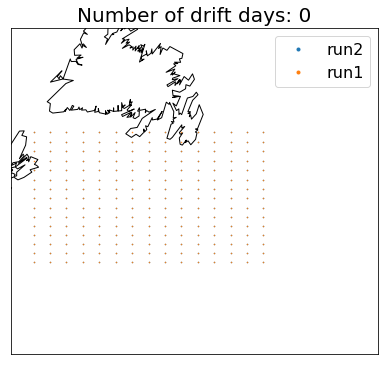

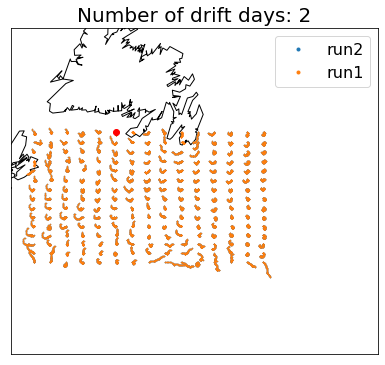

In [37]:
start=dates[0]
for n, date in enumerate(dates):
    fig,ax = plt.subplots(1,1, figsize=(10,6))
    m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=50,llcrnrlon=-61,urcrnrlon=-45,resolution='l')
    lat_run2 = run2.sel(time=slice(start,date)).mod_lat.values
    lon_run2 = run2.sel(time=slice(start,date)).mod_lon.values
    lat_run1 = run1.sel(time=slice(start,date)).mod_lat.values
    lon_run1 = run1.sel(time=slice(start,date)).mod_lon.values
    plot_Scatter(m, lat_run2,lon_run2, lat_run1,lon_run1)
    ax.set_title('Number of drift days: {}'.format(n), fontsize=20)
        # fake legend
    custom_lines = [Line2D([0], [0], marker='.', color='C0', lw=0),
                    Line2D([0], [0], marker='.', color='C1', lw=0)]
    ax.legend(custom_lines, ['run2', 'run1'],fontsize=16)
particle=215
x,y=m(run2.mod_lon.values[particle,0], run2.mod_lat.values[particle,0])
m.plot(x,y,'ro')

In [17]:
diffs = run2.mod_lon.diff('time')
inds = np.where(diffs==0)
inds

(array([ 75,  96, 121, 148, 150, 150, 150, 150, 150, 150, 215, 215, 215,
        215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215,
        215, 215, 215, 215, 215, 215, 215]),
 array([12, 38,  7,  0, 42, 43, 44, 45, 46, 47, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]))

In [18]:
diffs = run1.mod_lon.diff('time')
inds = np.where(diffs==0)
inds

(array([ 75,  96, 121, 148]), array([12, 38,  7,  0]))

In [21]:
run2.mod_lon.values[215,:]

array([-56.42857 , -56.428036, -56.42785 , -56.428196, -56.429077,
       -56.43021 , -56.431435, -56.432796, -56.43422 , -56.435345,
       -56.43587 , -56.435726, -56.43526 , -56.434772, -56.434326,
       -56.433777, -56.432793, -56.431324, -56.429634, -56.428013,
       -56.426693, -56.425545, -56.423985, -56.421688, -56.418762,
       -56.417477, -56.417477, -56.417477, -56.417477, -56.417477,
       -56.417477, -56.417477, -56.417477, -56.417477, -56.417477,
       -56.417477, -56.417477, -56.417477, -56.417477, -56.417477,
       -56.417477, -56.417477, -56.417477, -56.417477, -56.417477,
       -56.417477, -56.417477, -56.417477, -56.417477], dtype=float32)

# Weird stationary particles
* This is just a check on the weird stationary data to see if the problem persists in the daily DriftMap and DriftEval runs

## DriftMap

In [25]:
run3=xr.open_dataset('/home/soontiensn/data/gpsc-work2/OPP/riops_daily/DriftMap/20200113/runs/riopsps_od_2020011300_P2D/OpenDrift_raw_trajectory_2020-01-13_00h.nc')
diffs = run3.lon.diff('time')

In [26]:
inds=np.where(diffs==0)
inds

(array([   8,   20,  103, ..., 2474, 2474, 2474]),
 array([46, 47,  7, ..., 45, 46, 47]))

In [27]:
inds[0].shape

(14358,)

In [33]:
diffs = run3.lat.diff('time')
inds=np.where(diffs==0)
inds

(array([ 119,  157,  157, ..., 2474, 2474, 2474]),
 array([36,  2,  6, ..., 45, 46, 47]))

## DriftEval

In [28]:
run4=xr.open_dataset('/home/soontiensn/data/gpsc-work2/OPP/riops_daily/DriftEval/20191116/runs/riopsps_od_2019111600_P2D/OpenDrift_raw_trajectory_2019-11-16_00h.nc')
diffs = run4.lon.diff('time')

In [29]:
inds=np.where(diffs==0)
inds

(array([  9,  12,  12,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
         36,  36,  36,  36,  36,  36,  36,  36,  39,  39,  39,  39,  39,
         39,  39,  39,  39,  39,  39,  39,  39,  39,  39,  39,  39,  39,
         39,  39,  39,  39,  39,  39,  39,  39,  39,  39,  39,  39,  39,
         39,  39,  39,  39,  39,  40,  40,  40,  40,  40,  40,  40,  40,
         40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
         40,  64, 111, 148]),
 array([42,  1, 35, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
        25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
        42, 43, 44, 45, 46, 47, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 19, 45, 40]))

In [35]:
diffs = run4.lat.diff('time')
inds=np.where(diffs==0)
inds

(array([ 36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,  36,
         36,  36,  36,  36,  36,  39,  39,  39,  39,  39,  39,  39,  39,
         39,  39,  39,  39,  39,  39,  39,  39,  39,  39,  39,  39,  39,
         39,  39,  39,  39,  39,  39,  39,  39,  39,  39,  39,  39,  39,
         39,  39,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40,
         40,  40,  40,  40,  40,  40,  40,  40,  40,  40,  40, 137]),
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
        47, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
        45, 46, 47, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
        40, 41, 42, 43, 44, 45, 46, 47, 11]))